# Windy Grid
---
Tenemos un mundo cuadriculado donde podemos caminar en 4 direcciones distintas, arriba, abajo, izquierda y derecha, no se pueden atravesar paredes. El objetivo principal es llegar de un punto a otro, pero existe un elemento al que se llama "viento", en algunas columnas existe una fuerza de otro mundo que nos movera hacia arriba si caminamos hacia esa columna.

Para resolver el problema utilizaremos aprendizaje por refuerzo, definiremos el problema un paso un episodio y lo que es aprendizaje de esto

In [10]:
using PyPlot
ioff()

Iniciamos definiendo el tamano de nuestro mundo cuadriculado, en este caso es un mundo de 7x10. Posterior a esto definimos en que columnas el viento va afectar a nuestro individuo en su movimiento. A su vez definiremos donde va a empezar nuestro individuo y cual es el objetivo a alcanzar. 
definimos que es la recompensa, que es el alpha y la probabilidad de aprendizaje.

In [11]:
WORLD_HEIGHT = 7
WORLD_WIDTH = 10
WIND = [0, 0, 0, 1, 1, 1, 2, 2, 1, 0]

ACTION_UP = 1
ACTION_DOWN = 2
ACTION_LEFT = 3
ACTION_RIGHT = 4
START = [4,1]
GOAL = [4,8]

EPSILON = 0.1
ALPHA = .5
REWARD = -1

ACTIONS = [ACTION_UP,ACTION_DOWN,ACTION_LEFT,ACTION_RIGHT];

# Un Paso
---
Un paso hace una accion, si la columna a donde se movio es una columna con viento, tambien se mueve hacia arriba


In [12]:
function step(state, action)
    i, j = state
    if action == ACTION_UP
        return [max(i - 1 - WIND[j], 1), j]
        
    elseif action == ACTION_DOWN
         return [max(min(i + 1 - WIND[j], WORLD_HEIGHT), 1), j]
        
    elseif action == ACTION_LEFT
        return [max(i - WIND[j], 1), max(j - 1, 1)]
        
    elseif action == ACTION_RIGHT
        return [max(i - WIND[j], 1), min(j + 1, WORLD_WIDTH)]
    end
end

step (generic function with 1 method)

### Un episodio
---
En si un episodio es el repetir pasos hasta que se llegue a un objetivo o hasta que llegue a un limite que se haya impuesto.

---
### exploracion y explotacion
---
exploracion en este contexto le llamamos a que vamos a elegir algo que no sea lo mejor que conocemos al momento, con una probabilidad de epsilon, haremos esto que llamamos exploracion, donde simplemente elegiremos al azar una de las acciones, con el objetivo de precisamente explorar mas acciones. LINEA 8 y LINEA 26

Explotacion en este contexto le llamamos a elegir el mejor candidato que conocemos, en este problema es simplemente elegir en la tabla q cual es la mejor accion que posible. LINEA 10 y LINEA 28

---
# Sarsa
---
Sarsa es un algoritmo de aprendizaje para politicas de procesos de decision markoviana. Se basa en una tabla de "valores Q", el algoritmo es bastante sencillo y facil de comprender, dados un estado, una accion, una recompensa, el siguiente estado y la siguiente accion, se puede actualzar la tabla Q en el estado y en la accion. dado (s, a, r, s+1, a+1) 
Q(s,a) = Q(s,a) + α( r + γ * Q(s+1,a+1) - Q(s,a)) LINEA 40

Se aplica sarsa iterativamente hasta llegar al final del episodio o a un limite predefinido, donde siempre se va a calcular la nueva accion o se elegira una al azar dependiendo de si se realiza exploracion o explotacion

In [13]:
function episode(q_value)
    # track the total time steps in this episode
    time = 0
    
    # initialize state
    state = START
    # choose an action based on epsilon-greedy algorithm
    if rand(1)[1] < EPSILON
        action = ACTIONS[rand(1:4)]
    else
        values_ = q_value[state[1], state[2], :]
        action = []
        for i in enumerate(values_)
            action_,value_ = i
            if value_ == maximum(values_)
                push!(action,action_)
            end
        end
        action = action[rand(1:length(action))]
    end
    
    # keep going until get to the goal state
    while state != GOAL

        next_state = step(state,action)
        if rand(1)[1] < EPSILON
            next_action = ACTIONS[rand(1:4)]
        else
            values_ = q_value[next_state[1], next_state[2], :]
            next_action = []
            for i in enumerate(values_)
                action_,value_ = i
                if value_ == maximum(values_)
                    push!(next_action,action_)
                end
            end
            next_action = next_action[rand(1:length(next_action))]
        end
        # Sarsa update
        q_value[state[1], state[2], action] += ALPHA * (REWARD + q_value[next_state[1], next_state[2], next_action] - q_value[state[1], state[2], action])
        state = next_state
        action = next_action
        time += 1
    end

    return time
end

episode (generic function with 1 method)

In [14]:
function print_optimal_policy(q_value)
    optimal_policy = []
    for i in range(1, stop=WORLD_HEIGHT)
        push!(optimal_policy,[])
        for j in range(1, stop=WORLD_WIDTH)
            if [i, j] == GOAL
                append!(optimal_policy[end], 'G')
                continue
            end
            bestAction = argmax(q_value[i, j, :])
            if bestAction == ACTION_UP
                append!(optimal_policy[end], '↑')
            elseif bestAction == ACTION_DOWN
                append!(optimal_policy[end], '↓')
            elseif bestAction == ACTION_LEFT
                append!(optimal_policy[end], '←')
            elseif bestAction == ACTION_RIGHT
                append!(optimal_policy[end], '→')
            end
        end
    end
    for row in optimal_policy
        println(row)
    end
end

print_optimal_policy (generic function with 1 method)

# iterar episodios
---
En este ultimo cuadro antes de los resultados se ve como se corre el algoritmo para un numero de n episodios

In [15]:
function runagent(n)
    q_value = zeros((WORLD_HEIGHT,WORLD_WIDTH,4))

    steps = []
    ep = 0
    while ep < n
        push!(steps,episode(q_value))
        ep+=1
    end
    println("SARSA Optimal Policy:")
    print_optimal_policy(q_value)
    println("")
    return steps
end


runagent (generic function with 1 method)

In [16]:
print_optimal_policy(zeros((WORLD_HEIGHT,WORLD_WIDTH,4)))

Any['↑', '↑', '↑', '↑', '↑', '↑', '↑', '↑', '↑', '↑']
Any['↑', '↑', '↑', '↑', '↑', '↑', '↑', '↑', '↑', '↑']
Any['↑', '↑', '↑', '↑', '↑', '↑', '↑', '↑', '↑', '↑']
Any['↑', '↑', '↑', '↑', '↑', '↑', '↑', 'G', '↑', '↑']
Any['↑', '↑', '↑', '↑', '↑', '↑', '↑', '↑', '↑', '↑']
Any['↑', '↑', '↑', '↑', '↑', '↑', '↑', '↑', '↑', '↑']
Any['↑', '↑', '↑', '↑', '↑', '↑', '↑', '↑', '↑', '↑']


tras correr nuestro algoritmo esta es nuestra nueva tabla qa diferencia de la de arriba que es la tabla q antes de haber aprendido

In [17]:
y = runagent(300);

SARSA Optimal Policy:
Any['↓', '→', '←', '→', '→', '→', '→', '↑', '→', '↓']
Any['→', '→', '→', '→', '↑', '→', '→', '↑', '↓', '↓']
Any['→', '→', '→', '→', '→', '→', '→', '↓', '↑', '↓']
Any['→', '→', '→', '→', '→', '↓', '→', 'G', '→', '↓']
Any['→', '→', '→', '→', '→', '→', '↑', '↓', '←', '←']
Any['↓', '↑', '↓', '↑', '→', '↑', '↑', '↓', '←', '↓']
Any['→', '→', '→', '→', '↑', '↑', '↑', '↑', '←', '←']



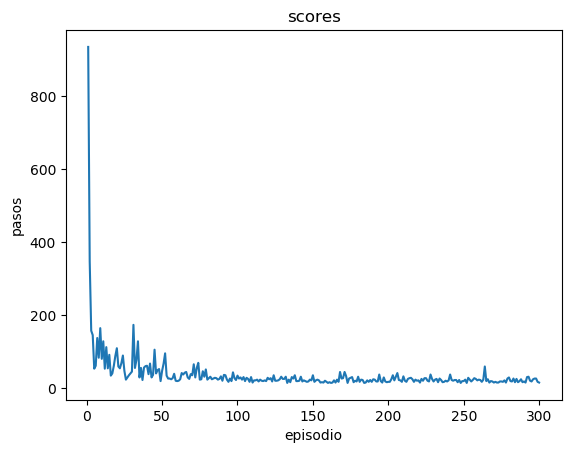

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000257BC080>

In [18]:
plt[:title]("scores")
plt[:xlabel]("episodio")
plt[:ylabel]("pasos")
plt[:plot]([i for i in 1:length(y)],y)

como podemos observar, durante los primeros pasos nuestro agente tardo demasiado tiempo en llegar a su objetivo, pero rapidamente crea una politica buena, y el nuemro de pasos disminuye dramaticamente, esto quiere deicr que nuestro algoritmo esta verdaderamente aprendiendo o mejor dicho creando politicas suficientemente buenas para nuestro problema a solucionar